In [38]:
# K is the combined carrying capacity of both species
# The carrying capacity of an environment is the maximum population size of a biological species that can
# be sustained in that environment

# P is supposed to be one species and Q is a different one
# P and Q are their populations
# s and v are constants that represent the negative effect? that they have on each other. Both can be different
# r and u are positive constants that represent the rate of growth of each species
# 1 - (P + Q) / K represents the negative effects of competition based on the struggle for resources
# sPQ and vPQ represent the negative effects of competition on their growth rate based in other mechanisms apart from the struggle for resources

def competition_model_p(r, P, Q, K, s):
    return P + (r * P * (1 - (P + Q) / K) - s * P * Q)

def competition_model_q(u, P, Q, K, v):
    return Q + (u * Q * (1 - (P + Q) / K) - v * P * Q)

In [39]:
# Function to generate multiple generations based on the formulas

def generate_competition_effects(r, s, u, v, P, Q, K, generations):
    print(P)
    model_p_history = []
    model_p_history.append(P)
    model_q_history = []
    model_q_history.append(Q)
    
    for generation in range(generations):
        model_p_history.append(competition_model_p(r, model_p_history[generation], model_q_history[generation], K, s))
        model_q_history.append(competition_model_q(u, model_p_history[generation], model_q_history[generation], K, v))
    
    models_history = [model_p_history, model_q_history]
    return models_history
    



In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [145]:
def plot_109(r, s, u, v, P, Q, K, generations):
    models = generate_competition_effects(r, s, u, v, P, Q, K, generations)
    models_data = pd.DataFrame({"p": models[0], "q": models[1]})
    print(models_data)
    plt.figure(figsize = (20, 5))
    plt.subplot(1,2,1)
    ax = sns.lineplot(data = models_data, markers = True, dashes = False)
    ax.set(title = "Population comparison")
    plt.subplot(1,2,2)
    bx = sns.lineplot(data = models_data, x = "p", y = "q", dashes = False)
    plt.annotate(text = "Start", xy=(models[0][0], models[1][0]), xytext = (models[0][0] - 0.5, models[1][0] + 1))
    bx.set(title = "Phase plot")
    

20
                p          q
0    2.000000e+01  20.000000
1    8.000000e+00  12.000000
2    7.920000e+00  13.080000
3    7.445592e+00  14.114628
4    6.695503e+00  15.266176
..            ...        ...
96   3.045611e-64  40.000000
97  -6.091223e-65  40.000000
98   1.218245e-65  40.000000
99  -2.436489e-66  40.000000
100  4.872978e-67  40.000000

[101 rows x 2 columns]


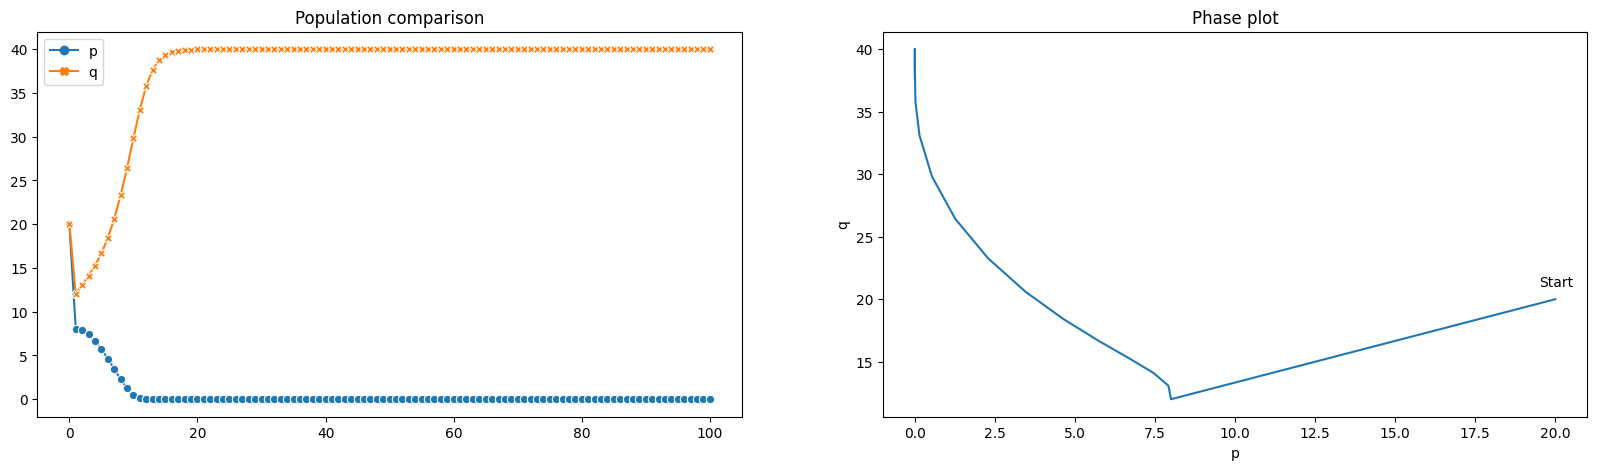

In [146]:
plot_109(0.7, 0.03, 0.5, 0.02, 20, 20, 40, 100)